<a href="https://colab.research.google.com/github/hamsterjoa/Machine_Learning_Practical/blob/main/Credit_card_fraud_detection_by_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

In [31]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Udemy/input/creditcard.csv')

## Data exploration

In [32]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Pre-processing

In [33]:
from sklearn.preprocessing import StandardScaler
data['normalizeAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis=1)

In [34]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizeAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [35]:
data = data.drop(['Time'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizeAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [36]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [37]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizeAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [38]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
X_train.shape

(199364, 29)

In [41]:
X_test.shape

(85443, 29)

In [42]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep neural network

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [44]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                480       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                500       
                                                                 
 dense_8 (Dense)             (None, 24)                504       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-traina

In [46]:
# Training
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 36s 3ms/step - loss: 0.0091 - accuracy: 0.9986
Epoch 2/5
13291/13291 [==============================] - 33s 2ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 34s 3ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 33s 2ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 35s 3ms/step - loss: 0.0033 - accuracy: 0.9994


In [47]:
score = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0033 - accuracy: 0.9994


In [48]:
print(score)

[0.0033468978945165873, 0.9993914365768433]


In [49]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [50]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [51]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [52]:
print(cnf_matrix)

[[85279    17]
 [   35   112]]


Confusion matrix, without normalization
[[85279    17]
 [   35   112]]


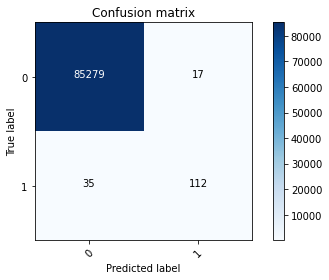

In [53]:
plot_confusion_matrix(cnf_matrix, classes=[0, 1])

대부분의 정상 거래를 바르게 감지했습니다(85279건). 부정거래도 많이 잡아냈지만 여전히 정상으로 감지해서 놓친 부정거래가 있습니다(35건). 이는 정상이라고 예측해서 놓친 수 입니다. 예측은 0이었지만 실제 라벨은 1이라 사실은 부정거래였던 것입니다. 그러니까 150명 가량의 유저 중에 35명은 우리한테서 훔쳐갈 수 있었다는 뜻입니다.

Confusion matrix, without normalization
[[284260     55]
 [   109    383]]


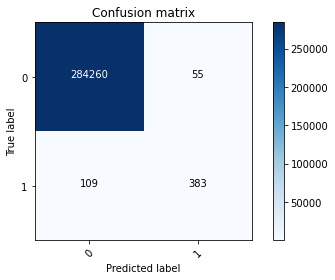

In [54]:
y_pred = model.predict(X) # 전체 X 파라미터 사용
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0, 1])
plt.show()

잘못 라벨링된 거래가 100건이 넘습니다.

## Undersampling
많은 레이블을 가진 데이터 세트를 적은 레이블을 가진 데이터 세트 수준으로 감소시키는 기법입니다.

In [55]:
fraud_indices = np.array(data[data.Class == 1].index) # 부정거래 인덱스 생성
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [56]:
normal_indices = data[data.Class ==0].index # 정상거래 인덱스 생성

In [57]:
# 정상거래 인덱스에서 부정거래의 수와 일치하는 무작위 샘플 선택
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [58]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [59]:
under_sample_data = data.iloc[under_sample_indices, :]

In [60]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3)

In [62]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                480       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                500       
                                                                 
 dense_8 (Dense)             (None, 24)                504       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-traina

In [64]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
46/46 [==============================] - 1s 3ms/step - loss: 0.3723 - accuracy: 0.8881
Epoch 2/5
46/46 [==============================] - 0s 3ms/step - loss: 0.2211 - accuracy: 0.9026
Epoch 3/5
46/46 [==============================] - 0s 3ms/step - loss: 0.1899 - accuracy: 0.9142
Epoch 4/5
46/46 [==============================] - 0s 3ms/step - loss: 0.1740 - accuracy: 0.9186
Epoch 5/5
46/46 [==============================] - 0s 3ms/step - loss: 0.1529 - accuracy: 0.9288


Confusion matrix, without normalization
[[143   0]
 [ 15 138]]


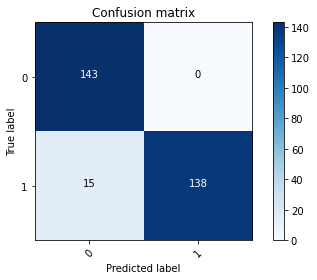

In [65]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[283888    427]
 [    58    434]]


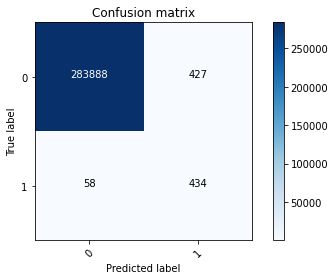

In [66]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

## SMOTE
SMOTE는 Synthetic Minority Over-sampling Technique의 약자로, 대표적인 오버 샘플링 기법 중 하나이다. 이는 낮은 비율로 존재하는 클래스의 데이터를 최근접 이웃[k-NN 알고리즘] 알고리즘을 활용하여 새롭게 생성하는 방법이다. 오버 샘플링 기법 중 단순 무작위 추출을 통해 데이터의 수를 늘리는 방법도 존재하는데, 데이터를 단순하게 복사하기 때문에 과적합 문제가 발생하기도 한다. 이에 반해 SMOTE는 알고리즘을 기반으로 데이터를 생성하므로, 과적합 발생 가능성이 단순 무작위 방법보다 적다.

In [ ]:
! pip install -U imbalanced-learn

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
X_resample, y_resample = SMOTE().fit_resample(X,y.values.ravel())

In [86]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3)

In [88]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [89]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
26537/26537 [==============================] - 68s 3ms/step - loss: 0.0071 - accuracy: 0.9985
Epoch 2/5
26537/26537 [==============================] - 67s 3ms/step - loss: 0.0068 - accuracy: 0.9985
Epoch 3/5
26537/26537 [==============================] - 66s 3ms/step - loss: 0.0067 - accuracy: 0.9987
Epoch 4/5
26537/26537 [==============================] - 67s 3ms/step - loss: 0.0063 - accuracy: 0.9987
Epoch 5/5
26537/26537 [==============================] - 67s 3ms/step - loss: 0.0064 - accuracy: 0.9986


Confusion matrix, without normalization
[[84863   185]
 [    0 85541]]


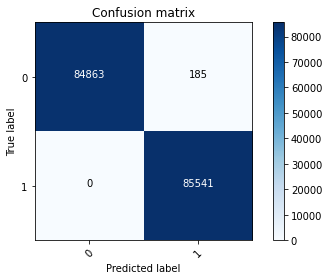

In [92]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[283762    553]
 [     0    492]]


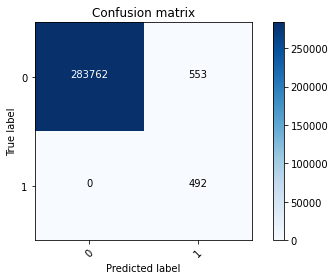

In [93]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()